In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

device = torch.device("cuda:0")

1. Data prepatation

In [2]:
training_data = datasets.MNIST(root="data", train=True, download=True, transform=ToTensor())
test_data = datasets.MNIST(root="data", train=False, download=True, transform=ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


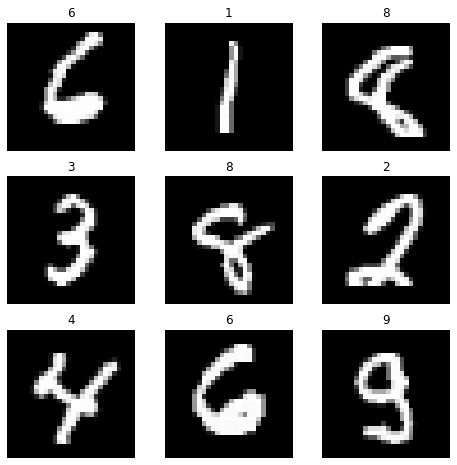

In [3]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [4]:
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset=training_data, batch_size=64, shuffle=True)

2. Defining a neural network

In [5]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,64)
        self.fc3 = nn.Linear(64,10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

In [6]:
net = Net().to(device)

3. Loss function and optimization method

In [7]:
loss_fuction = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = 0.001)

4. Training of the neural network

In [11]:
for epoch in range(20):
    loss_val = 0
    for itr, data in enumerate(train_loader):
        optimizer.zero_grad()

        inputs, labels = data
        
        inputs = inputs.to(device)
        labels = labels.to(device)

        pred = net(inputs)
        loss = loss_fuction(pred, labels)

        loss.backward()
        #optimizer.zero_grad()
        optimizer.step()

        loss_val += loss.item()

    print("Loss: ", loss_val)

Loss:  287.79841139540076
Loss:  106.448620993644
Loss:  70.66131340153515
Loss:  50.87681229272857
Loss:  39.908418313309085
Loss:  29.937699520844035
Loss:  24.02156528746127
Loss:  20.16139099645079
Loss:  17.257103534866474
Loss:  14.611268945081974
Loss:  12.295275918528205
Loss:  12.90077480351465
Loss:  9.932105171418698
Loss:  10.966258399752405
Loss:  8.491200962484754
Loss:  8.625546608372133
Loss:  8.233395194899003
Loss:  7.574995734166009
Loss:  10.446848280435006
Loss:  5.713167069815881


5. Prediction and Evaluation for test set 

In [14]:
input_test = test_data.data.float().to(device)

pred_test = net(input_test)
pred_category = torch.argmax(pred_test, dim=1)
label_test = test_data.targets.to(device)
accu = torch.mean((pred_category == label_test).float())
print("Test accuracy:", accu)

Test accuracy: tensor(0.9792, device='cuda:0')
